# 120 Years Olympic Data Analysis


 This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this dataset from Kaggle

 ### Problem Statement : How the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.<font/>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
athletes = pd.read_csv('athlete_events.csv')
regions= pd.read_csv('noc_regions.csv')

In [3]:
pd.set_option('display.max_columns',None,'display.max_rows',None)

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
athletes.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
athletes.shape

(271116, 15)

##### <font color=red>NOC = National Olympic Committee<font/>

In [7]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [8]:
# Join the dataframes
athletes_df = athletes.merge(regions,how ='left',on ='NOC')

In [9]:
athletes_df.shape

(271116, 17)

In [10]:
athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
notes     266077
dtype: int64

In [11]:
winter_season = athletes_df[athletes_df['Season']=='Winter']

In [12]:
winter_season.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [13]:
summer_season= athletes_df[athletes_df['Season']=='Summer']

In [14]:
summer_season.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


#### We can see that there are 20% missing value in Age, Weight and Height Medals and Notes have more than 80% missing value.

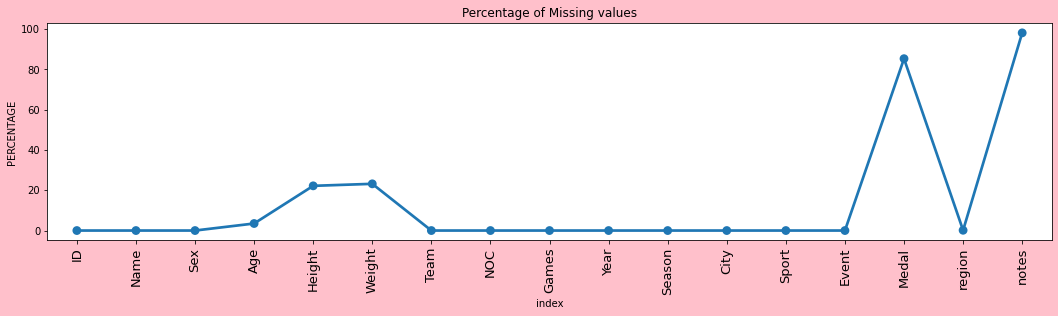

In [15]:
fig=plt.figure(figsize=(18,4))
missing = pd.DataFrame((athletes_df.isnull().sum())*100/athletes_df.shape[0]).reset_index()
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation = 90,fontsize =13)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
fig.set_facecolor('pink')
plt.show()

####  * Imputing the missing values for Age,  Height and  Weight columns with its mean value because they are correlated with each other medal and notes also have a missing value but we can't impute them because if we do then it will affect in our decision.

In [16]:
imp_col = ['Age', 'Height', 'Weight']
for col in imp_col:
    athletes_df[col] = athletes_df[col].fillna(np.mean(athletes_df[col]))
    athletes_df[col] = np.round(athletes_df[col],1)

#### * Deleted notes columns because its more than 80% null value and its unnecessary for our analysis

In [17]:
delete_col=athletes_df.drop('notes',axis=1,inplace=True)

#### * Imputed missing value in medal column with No Medal

In [18]:
 athletes_df.fillna({'Medal': 'No Medal'},inplace=True)

#### * In region column the null values is quite less so we can ignore null value

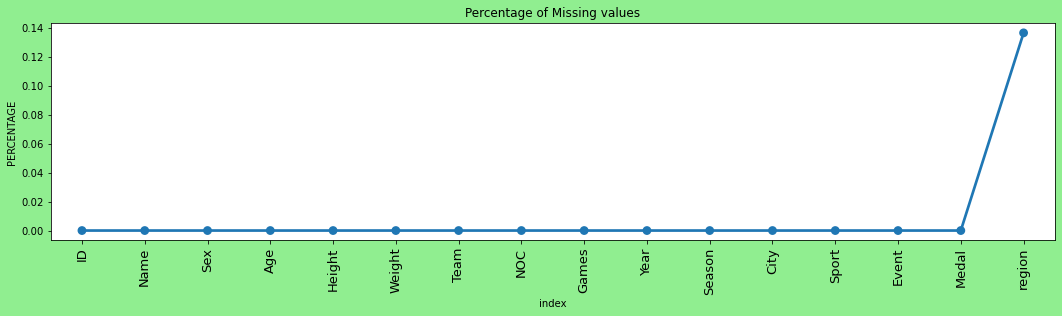

In [19]:
fig=plt.figure(figsize=(18,4))
miss = pd.DataFrame((athletes_df.isnull().sum())*100/athletes_df.shape[0]).reset_index()
ax = sns.pointplot('index',0,data=miss)
plt.xticks(rotation = 90,fontsize =13)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
fig.set_facecolor('lightgreen')
plt.show()

In [20]:
athletes_df.rename(columns={'region':"Region"},inplace=True)
athletes_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China
2,3,Gunnar Nielsen Aaby,M,24.0,175.3,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,175.3,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands


In [21]:
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
 15  Region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


In [22]:
athletes_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.558405,175.330321,70.701838,1978.378480
std,39022.286345,6.280862,9.278115,12.574690,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,22.000000,170.000000,63.000000,1960.000000
50%,68205.000000,25.000000,175.300000,70.700000,1988.000000
75%,102097.250000,28.000000,180.000000,75.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [23]:
print('Column Names:',athletes_df.columns)

Column Names: Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Region'],
      dtype='object')


In [24]:
# India Details
India = athletes_df.query('Team == "India"')
India.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
505,281,S. Abdul Hamid,M,25.6,175.3,70.7,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,No Medal,India
506,281,S. Abdul Hamid,M,25.6,175.3,70.7,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,No Medal,India
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,No Medal,India
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,No Medal,India
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,No Medal,India


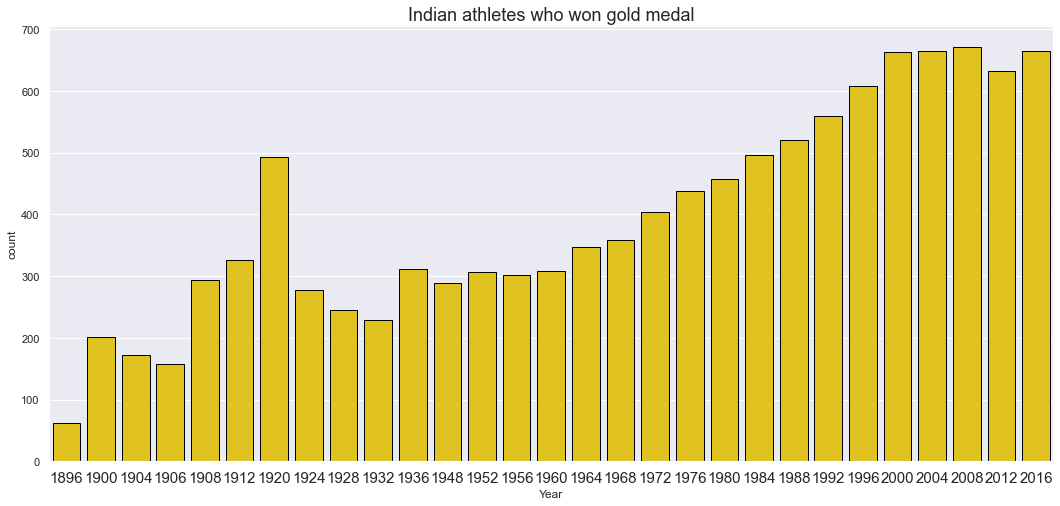

In [25]:
India=athletes_df[(athletes_df.Medal=='Gold')&(athletes_df.Season == 'Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(18,8))
sns.countplot(x='Year',data=India,color= 'gold',edgecolor='black')
plt.title('Indian athletes who won gold medal',fontsize=18)
plt.xticks(rotation = 360,fontsize =15)
plt.show()

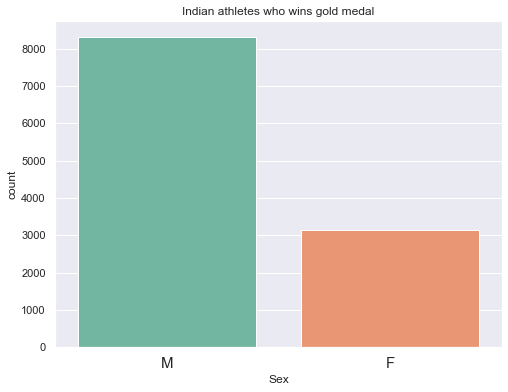

In [26]:
India=athletes_df[(athletes_df.Medal=='Gold')&(athletes_df.Season == 'Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',data=India,palette= 'Set2')
plt.title('Indian athletes who wins gold medal')
plt.xticks(rotation = 360,fontsize =15)
plt.show()

In [27]:
silver=athletes_df[(athletes_df.Medal=='Silver')&(athletes_df.Season == 'Summer')]
silver.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
86,25,Alf Lied Aanning,M,24.0,175.3,70.7,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,Netherlands
106,38,Karl Jan Aas,M,20.0,175.3,70.7,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia
175,73,Luc Abalo,M,31.0,182.0,86.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Handball,Handball Men's Handball,Silver,France


## In comparison of female athletes men athlete secured 62.5% more medals in summer olympics

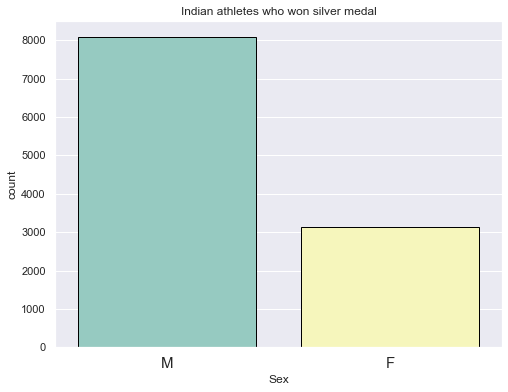

In [28]:
India=athletes_df[(athletes_df.Medal=='Silver')&(athletes_df.Season == 'Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',data=India, palette='Set3',edgecolor='black')
plt.title('Indian athletes who won silver medal')
plt.xticks(rotation = 360,fontsize =15)
plt.show()

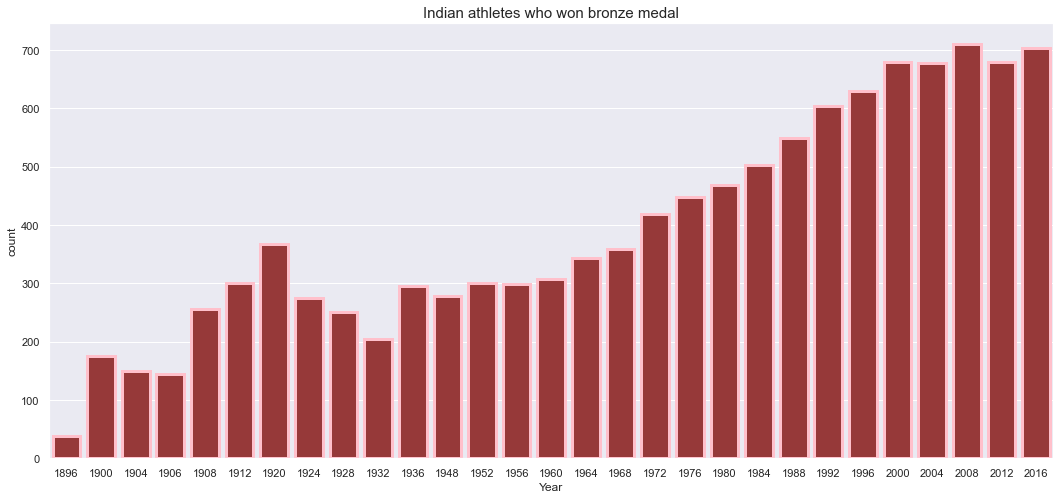

In [29]:
India=athletes_df[(athletes_df.Medal=='Bronze')&(athletes_df.Season == 'Summer')]
plt.figure(figsize=(18,8))
sns.countplot(x='Year',data=India,color= 'brown',edgecolor='pink',linewidth=3)
plt.title('Indian athletes who won bronze medal',fontsize =15)
plt.xticks(rotation = 360)
plt.show()

In [30]:
# Japan Details
athletes_df.query('Team == "Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,No Medal,Japan
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,No Medal,Japan
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",No Medal,Japan
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",No Medal,Japan
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",No Medal,Japan


In [31]:
# Japan details who won gold medal in Gymnastic
Japan=athletes_df[(athletes_df.Medal=='Gold')&(athletes_df.Sport == 'Gymnastics' )]
Japan.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
921,521,Isak Abrahamsen,M,21.0,175.3,70.7,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Gold,Norway
1237,697,Fausto Alesio Acke (Padovini-),M,22.0,175.3,70.7,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Swedish System",Gold,Sweden


In [32]:
# Top 5 coutries
top_5_coun=athletes_df.Team.value_counts().sort_values(ascending= False).head(5)
top_5_coun

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64

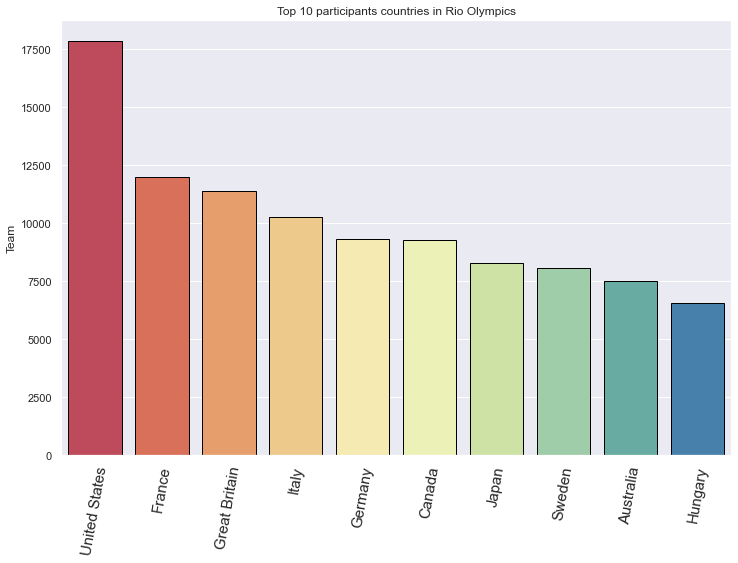

In [33]:
top_10_coun=athletes_df.Team.value_counts().sort_values(ascending= False).head(10)
top_10_coun
plt.figure(figsize=(12,8))
sns.set(style='darkgrid')
plt.xticks(rotation = 80,fontsize =15)
plt.title('Top 10 participants countries in Rio Olympics')
sns.barplot(x=top_10_coun.index,y=top_10_coun,palette='Spectral',edgecolor='black')
plt.show()

In [34]:
# Bottom 5 Teams in olympics
bot_5_team=athletes_df.Team.value_counts().sort_values(ascending= True).head(5)
bot_5_team

Hamburg        1
Mythilus       1
Verveine-41    1
Mignon-29      1
Tornade-16     1
Name: Team, dtype: int64

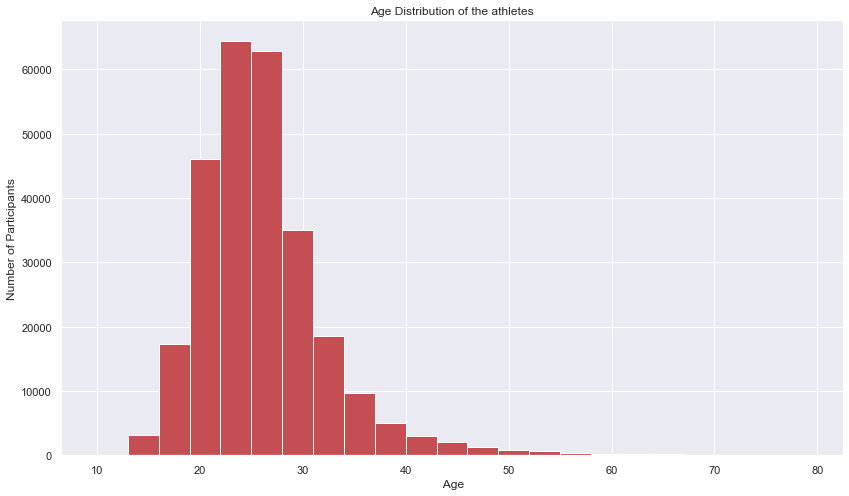

In [35]:
plt.figure(figsize=(14,8))
plt.title('Age Distribution of the athletes')
plt.xlabel(' Age')
plt.ylabel('Number of Participants')
plt.grid(True)
plt.hist(athletes_df.Age, bins = np.arange(10,80,3),color='r', edgecolor = 'white');

In [36]:
winter_sports=athletes_df[athletes_df.Season== 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [37]:
Summer_sports=athletes_df[athletes_df.Season== 'Summer'].Sport.unique()
Summer_sports.tolist()

['Basketball',
 'Judo',
 'Football',
 'Tug-Of-War',
 'Athletics',
 'Swimming',
 'Badminton',
 'Sailing',
 'Gymnastics',
 'Art Competitions',
 'Handball',
 'Weightlifting',
 'Wrestling',
 'Water Polo',
 'Hockey',
 'Rowing',
 'Fencing',
 'Equestrianism',
 'Shooting',
 'Boxing',
 'Taekwondo',
 'Cycling',
 'Diving',
 'Canoeing',
 'Tennis',
 'Modern Pentathlon',
 'Golf',
 'Softball',
 'Archery',
 'Volleyball',
 'Synchronized Swimming',
 'Table Tennis',
 'Baseball',
 'Rhythmic Gymnastics',
 'Rugby Sevens',
 'Trampolining',
 'Beach Volleyball',
 'Triathlon',
 'Rugby',
 'Lacrosse',
 'Polo',
 'Cricket',
 'Ice Hockey',
 'Racquets',
 'Motorboating',
 'Croquet',
 'Figure Skating',
 'Jeu De Paume',
 'Roque',
 'Basque Pelota',
 'Alpinism',
 'Aeronautics']

In [38]:
athletes_df.Sex.value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

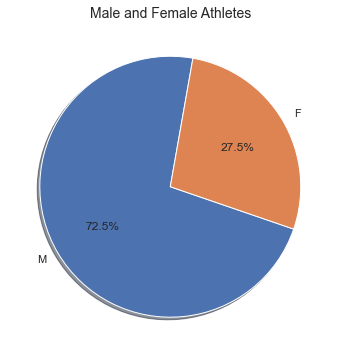

In [39]:
#Male and Female Athletes
Gender_count=athletes_df.Sex.value_counts()
plt.figure(figsize=(14,6))
plt.title('Male and Female Athletes',fontsize=14)
plt.pie(Gender_count,labels=Gender_count.index,autopct='%1.1f%%',startangle=80,shadow=True)
plt.show()

In [40]:
athletes_df.Medal.value_counts()

No Medal    231333
Gold         13372
Bronze       13295
Silver       13116
Name: Medal, dtype: int64

In [41]:
female_athletes= athletes_df[(athletes_df.Sex=='F')&(athletes_df.Season=='Summer')][['Sex','Year']]
female_athletes=female_athletes.groupby('Year').count().reset_index()
female_athletes.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [42]:
male_atheletes= athletes_df[(athletes_df.Sex=='M')&(athletes_df.Season=='Summer')][['Sex','Year']]
male_atheletes=male_atheletes.groupby('Year').count().reset_index()
male_atheletes.tail()

,Year,Sex
24,2000,8390
25,2004,7897
26,2008,7786
27,2012,7105
28,2016,7465


In [43]:
total_athelete = athletes_df.groupby("Season")["Sex"].count()
print("Total number of athelete in both season\n", total_athelete)

Total number of athelete in both season
 Season
Summer    222552
Winter     48564
Name: Sex, dtype: int64


#### Women participating in Olympic from the year 1896 - 2016

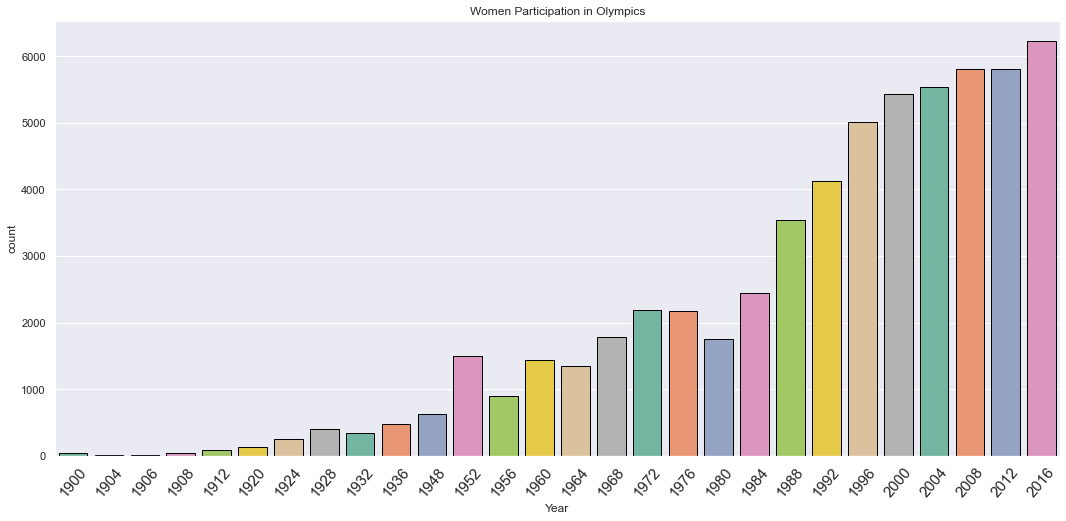

In [44]:
women_olympics=athletes_df[(athletes_df.Sex=='F')&(athletes_df.Season == 'Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(18,8))
sns.countplot(x='Year',data=women_olympics,palette='Set2',edgecolor='black')
plt.title('Women Participation in Olympics')
plt.xticks(rotation=50,fontsize =15)
plt.show()

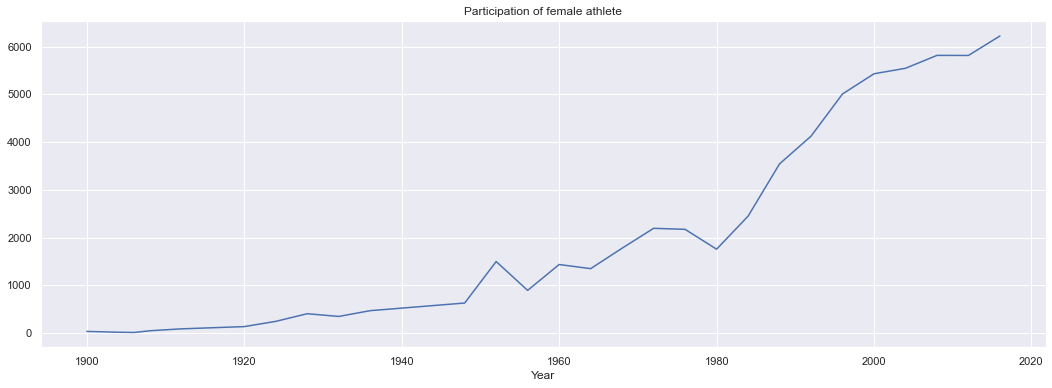

In [45]:
part=women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(18,6))
part.loc[:,'F'].plot()
plt.title('Participation of female athlete')
plt.show()

#### Men participating in Olympic from the year 1896 - 2016

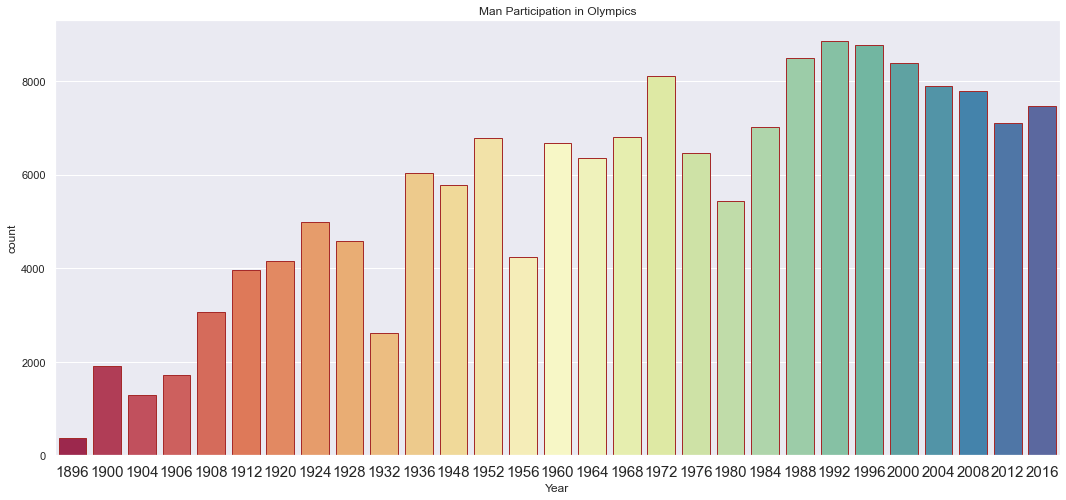

In [46]:
man_olympics=athletes_df[(athletes_df.Sex=='M')&(athletes_df.Season == 'Summer')]
sns.set(style='darkgrid')
plt.figure(figsize=(18,8))
sns.countplot(x='Year',data=man_olympics,palette='Spectral',edgecolor='brown')
plt.title('Man Participation in Olympics')
plt.xticks(rotation = 360,fontsize =15)
plt.show()

In [47]:
Gold_Medal=athletes_df[(athletes_df.Medal == 'Gold')]
Gold_Medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
3,4,Edgar Lindenau Aabye,M,34.0,175.3,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway


In [48]:
Gold_Medal=Gold_Medal[np.isfinite(Gold_Medal['Age'])]

In [49]:
# How many athletes secured gold medal beyond 60

Gold_Medal['ID'][Gold_Medal['Age']>60].count()

6

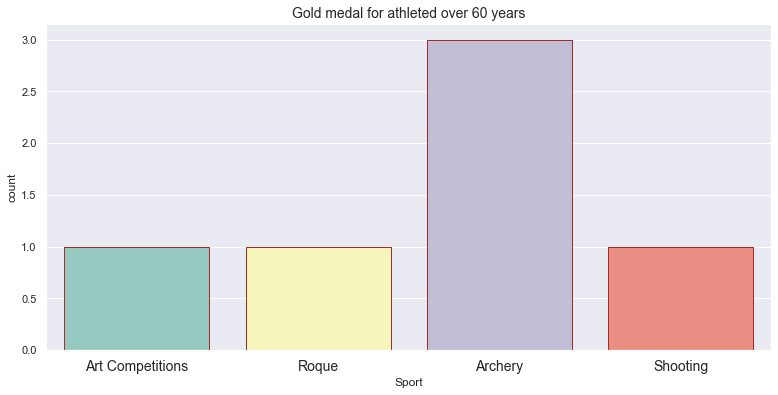

In [50]:
#In which sports athletes secured gold medal who is beyond 60

sport_event=Gold_Medal['Sport'][Gold_Medal['Age']>60]
fig=plt.figure(figsize=(13,6))
sns.countplot(sport_event,palette= 'Set3',edgecolor='brown')
plt.title('Gold medal for athleted over 60 years',fontsize= 14)
plt.xticks(rotation = 360,fontsize = 14)
plt.show()

In [51]:
# How many athletes secured gold medal at the age of 24

Gold_Medal['ID'][Gold_Medal['Age']==24].count()

1135

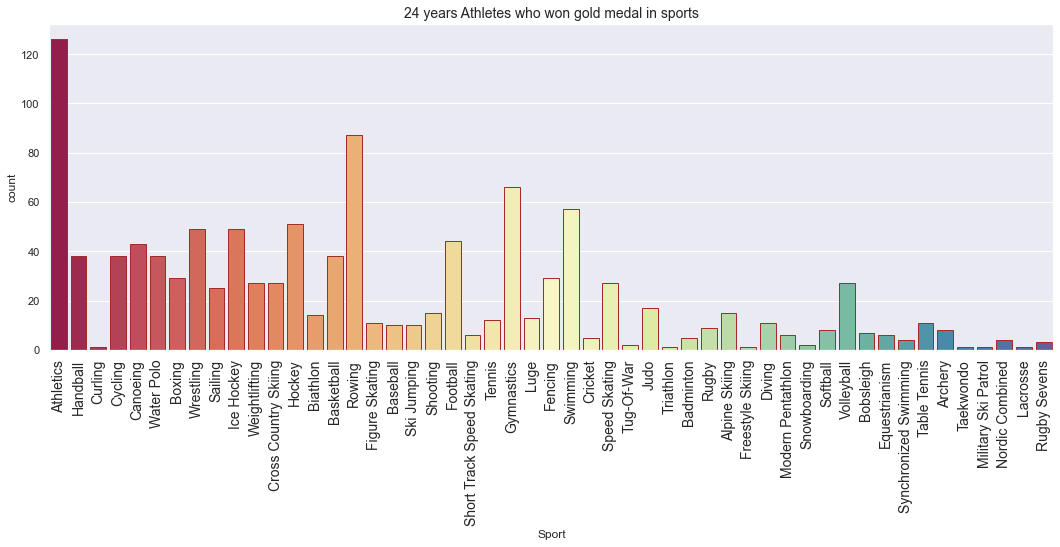

In [52]:
#In which sports athletes secured gold medal at th age of 24

sport_event=Gold_Medal['Sport'][Gold_Medal['Age']==24]
fig=plt.figure(figsize=(18,6))
sns.countplot(sport_event,palette= 'Spectral',edgecolor='brown')
plt.title('24 years Athletes who won gold medal in sports',fontsize= 14)
plt.xticks(rotation = 90,fontsize = 14)
plt.show()

In [53]:
totalgoldmedals= Gold_Medal.Region.value_counts().reset_index(name='Medal').head(5)
totalgoldmedals

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


In [54]:
totalgoldmedals= Gold_Medal.Team.value_counts().reset_index(name='Medal').head(8)
totalgoldmedals

,index,Medal
0,United States,2474
1,Soviet Union,1058
2,Germany,679
3,Italy,535
4,Great Britain,519
5,France,455
6,Sweden,451
7,Hungary,432


In [55]:
silver_Medal=athletes_df[(athletes_df.Medal == 'Silver')]
totalsilvermedals= silver_Medal.Team.value_counts().reset_index(name='Medal').head(8)
totalsilvermedals

,index,Medal
0,United States,1512
1,Soviet Union,716
2,Germany,627
3,Great Britain,582
4,France,518
5,Italy,508
6,Sweden,476
7,Australia,453


In [56]:
bronze_Medal=athletes_df[(athletes_df.Medal == 'Bronze')]
totalbronzemedals= bronze_Medal.Team.value_counts().reset_index(name='Medal').head(8)
totalbronzemedals

,index,Medal
0,United States,1233
1,Germany,678
2,Soviet Union,677
3,France,577
4,Great Britain,572
5,Australia,511
6,Sweden,507
7,Italy,484


In [57]:
# Rio Olympics

max_year = athletes_df.Year.max()
print (max_year)

team_names= athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team
team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

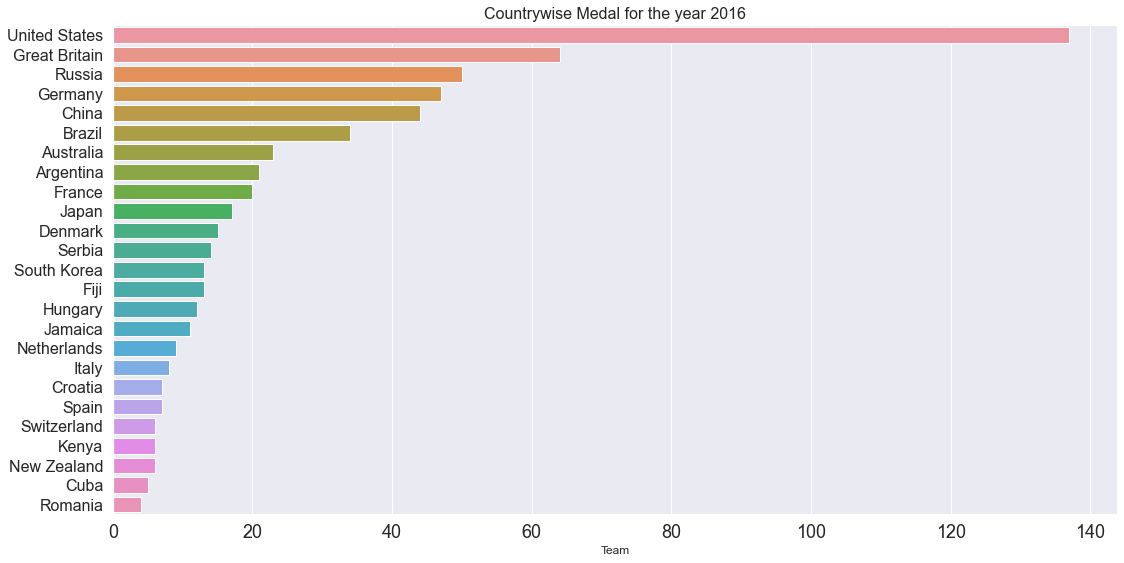

In [58]:
sns.set(style='darkgrid')
plt.figure(figsize=(18,9))
sns.barplot(x=team_names.value_counts().head(25),y=team_names.value_counts().head(25).index) 
plt.xticks(fontsize = 18)
plt.yticks(fontsize=16)
plt.ylabel(None);
plt.title('Countrywise Medal for the year 2016',fontsize=16,)
plt.show()

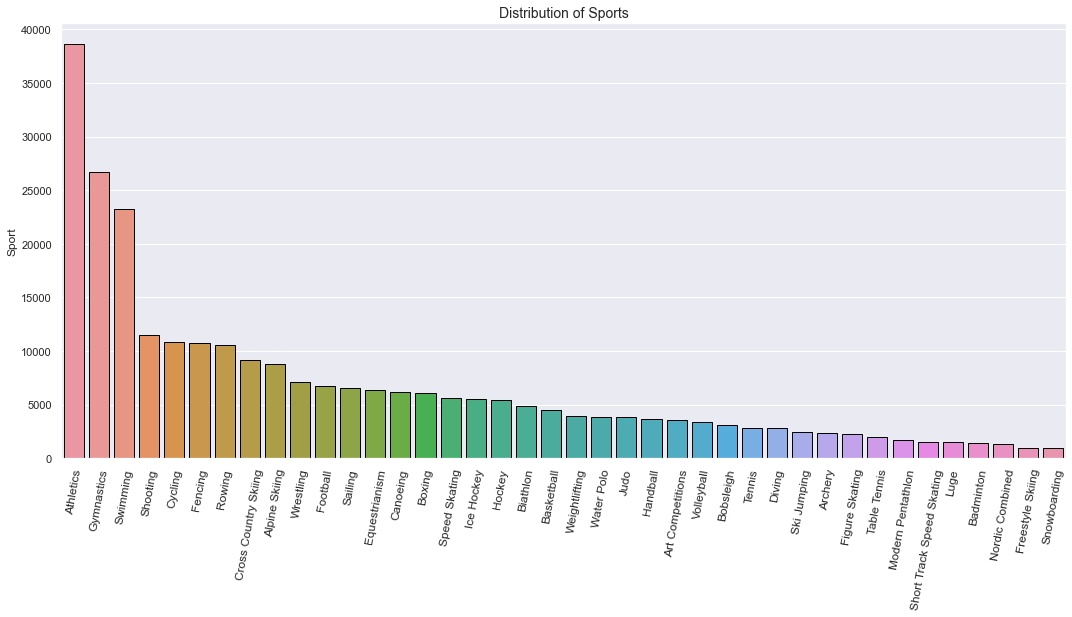

In [59]:
top_40_sports=athletes_df.Sport.value_counts().sort_values(ascending= False).head(40)
top_40_sports
plt.figure(figsize=(18,8))
sns.set(style='darkgrid')
plt.xticks(rotation = 80,fontsize =12)
plt.title('Distribution of Sports',fontsize=14)
sns.barplot(x=top_40_sports.index,y=top_40_sports,edgecolor='black')
plt.show()

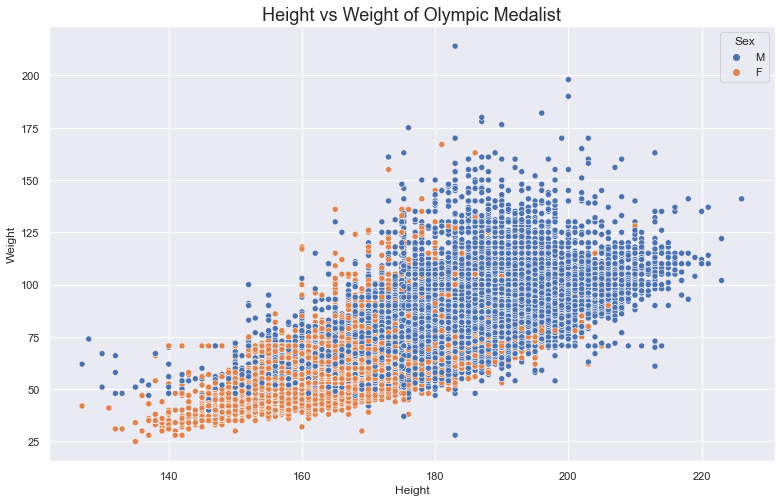

In [60]:
## Height and weight of athletes who won a medal

not_null_medal= athletes_df[(athletes_df['Height'].notnull())& (athletes_df['Weight'].notnull())]

plt.figure(figsize=(13,8))
axis = sns.scatterplot(x='Height',y='Weight',data=not_null_medal,hue='Sex')
plt.title('Height vs Weight of Olympic Medalist',fontsize=18)
plt.show()

#### Conclusion:

After analyzing this 120 years of Olympic History Dataset I find out amazing insights from this dataset so, our original question is What can 120 years of Olympic history tell us about the Games?

* Firstly, that the Olympic Games have been led my Male Athletes,but we can see that year after year that women start involving in Olympics.
* Secondly, the distribution weight vs Height have been changed through the years for men to be taller and heavier and for women to be smaller and thin for enough for the sports that they are on,beign an consistent but not drastically change over the years.
* Thirdly athletes who was above 60 years they also secured gold medals over the years.
* If we are looking the graphs we will found that after 1948 indian athletes played really well in Olympics and he secured lots of medals.
* Finally, history about the Games told us more about the winner, the Gold Medal Winner, following the same patterns of the aforementioned, being usually athletes in their mid-twenties, specifically 24 years old athletes are quite intrested in athletes, Gymnasting and rowing.